<a href="https://colab.research.google.com/github/Michael-Siri/AI-CAP4630/blob/master/HW3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Michael Siripongpibul 
CAP4630

In [0]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%tensorflow_version 2.x
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf



# Question 1 Generate and Display Random Data

 The get_random_data function takes in 5 parameters of w,b,mu,sigma, and m. Where sigma is the standard deviation and mu is the mean; The function returns array data of shape (m, 2) and the array labels of shape (m, 1). 

In [0]:
def get_random_data(w,b,mu,sigma,m):
  # np.random.seed(1)
  labels = []
  data = []
  
  for x in range(0, m):
    labels.append(np.random.choice([0,1]))
  for x in range(0,m):
    c = labels[x]
    n = np.random.default_rng().normal(mu, sigma, 1)
    x_1 = random.uniform(0,1)
    filler = w * x_1 + b + (-1)**c * n
    x_2 = filler[0]
    data.append((x_1,x_2))
  return data, labels




display_random_Data takes parameters of arrays labels and data to create a scatterplot of points in data.

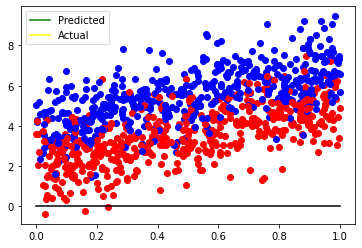

In [3]:
def display_random_data(data, labels, x_new, y_new, old_x, old_y, x1_w, x2_w):
  fig2 = plt.figure()
  ax = plt #.axes(projection='3d')
  xs = [x[0] for x in data]
  ys = [x[1] for x in data]
  # ax.scatter3D(xs, ys)
  for x in range(0,len(labels)):
    if labels[x] == 1:
      ax.scatter(xs[x],ys[x], color = 'r')
    else:
      ax.scatter(xs[x],ys[x], color = 'b')
  ax.plot(x_new, y_new, color='green', label ="Predicted")
  ax.plot(old_x, old_y, color='yellow', label ="Actual")
  x_h = np.linspace(0,1,3)
  plt.plot(x_h, x_h*x1_w + x2_w, color = 'black')
  ax.legend()
  ax.plot()


data, labels = get_random_data(3,3,1,1,1000)
display_random_data(data, labels, 0, 0, 0, 0, 0 , 0)

# Question 2 Logistic Regression with Keras

Splits the data generated in question 1 and uses keras to implement logistic regression with two included features. Then plots 2 lines separating the blue and red dots; One is the actual and the other is predicted by logistic regression.

In [4]:
#Splitting the data into a training set and a validation set
# training set
train_data = data[:800]
train_labels = labels[:800]
train_data = np.array(train_data)
train_labels = np.array(train_labels)

# test set
test_data = data[800:]
test_labels = labels[800:]
test_data = np.array(test_data)
test_labels = np.array(test_labels)

#Creating the model
network = models.Sequential()
network.add(layers.Dense(1, activation = 'sigmoid', input_shape=(2,)))

#Training
network.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
network.fit(train_data, train_labels, epochs=100, validation_data=(test_data, test_labels))

Epoch 1/100
25/25 [==============================] - 0s 9ms/step - loss: 2.0255 - accuracy: 0.5025 - val_loss: 1.8175 - val_accuracy: 0.5050
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4171 - accuracy: 0.5088 - val_loss: 1.2387 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9438 - accuracy: 0.5263 - val_loss: 0.8010 - val_accuracy: 0.5200
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.6050 - val_loss: 0.6007 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7450 - val_loss: 0.5791 - val_accuracy: 0.7550
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.8138 - val_loss: 0.5703 - val_accuracy: 0.7550
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.8163 - val_loss: 0.5597 - val_accuracy: 0.7650
Epoch 8/100
2

# Model Accuracy

In [5]:
test_loss, test_acc = network.evaluate(test_data, test_labels)


7/7 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7950


In [6]:

test_acc


0.7950000166893005

In [7]:
test_loss


0.48285895586013794

Showing predicted Line and the actual line

Actual line:

$Y = w*x+b$

Predicted Line:

$Y = -\frac{b/w2}{b/w1} -\frac{b}{w2}$

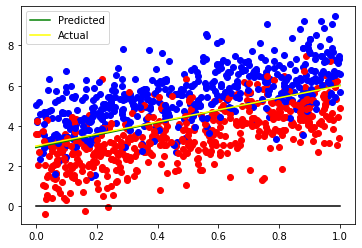

In [8]:
#obtain the separating line determined by the model by extracting the weights from the dense layer using the function get_weights
x = np.linspace(0, 1, 100)
weights = network.layers[0].get_weights()
#bias
b = weights[1][0]
#weights
x1_w = weights[0][0][0]
x2_w = weights[0][1][0]
#calculations
y = (-b/x2_w) + ((-b/x2_w)/(b/x1_w)) * x
old_x = np.array(range(0, 2))
old_y = 3 * old_x + 3

display_random_data(data, labels, x,y, old_x, old_y,0 ,0)



The predicted line is a bit hard to see behind the yellow line

# HeatMap Visualization of model
to visualize $f: R^2 -> R$ 

Text(0, 0.5, 'X_2')

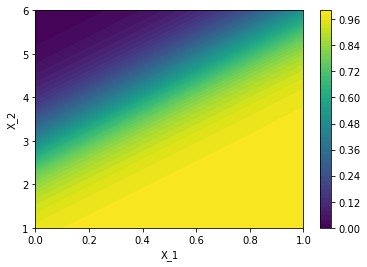

In [9]:
x_h = np.linspace( 0, 1, 100)
y_h = np.linspace( 1, 6, 100)
X,Y = np.meshgrid(x_h,y_h)
# Y = np.meshgrid(y_h)
z = network.predict(np.c_[X.flatten(),Y.flatten()])
z = z.reshape((100,100))
plt.contourf(X,Y,z,50)
plt.colorbar()
plt.xlabel('X_1')
plt.ylabel('X_2')

# Question 3 Using numpy to implement logistic regression
# Unfinished

In [0]:
#Source https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb
#Source https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf

Sigmoid function: 

$=\frac{1}{1+e^-z}$

Binary cross-entropy loss function:

$=-y log a - (1-y)log(1-a)$




In [0]:
def sigmoid(x):
  res = 1/(1+np.exp(x))
  return res

In [0]:
def bce(y, a):
  res = -y*np.log10(a)-(1-y)*np.log10(1-a)
  return res



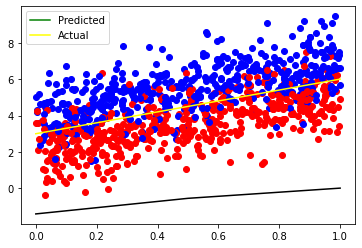

In [13]:
epoches= 200
lr = .01
b_size = 800
weights = np.random.rand(3,1)
X_b = np.column_stack((train_data,np.ones(shape = (b_size, 1))))
weight_path_mgd = []
weight_path_mgd.append(weights)


for epoch in range(epoches):
  # shuffled_indices = np.random.permutation()
  # X_b_shuffled = train_data[shuffled_indices]
  # y_shuffled = y[shuffled_indices]
  for i in range(b_size):
    z= np.dot(X_b[i],weights)
    a= sigmoid(z)
        # gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        # weight = weight - lr * gradient
    # gradient = 1/b_size * X_b.T.dot(X_b.dot(weights)-labels)
    gradient = 1/b_size * (X_b[i]*(a-labels[i])).T
    weights = weights-lr*gradient

#bias
b = weights[1][0]
#weights
x1_w = weights[0]/weights[1]
#calculations
# y = (-b/x2_w) + ((-b/x2_w)/(b/x1_w)) * x
x2_w = -weights[2]/weights[1]

old_x = np.array(range(0, 2))
old_y = 3 * old_x + 3

display_random_data(data, labels, 0,0, old_x, old_y, x1_w, x2_w)


# HeatMap visual - Incomplete

Similar to the previous heatmap but using Z values from the new numpy regression model

Text(0, 0.5, 'X_2')

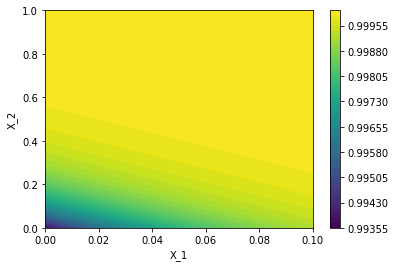

In [14]:

train_data2 = np.append(np.ones((train_data.shape[0],1)), train_data, axis = 1)
# print(train_data2)
w = np.zeros((train_data2.shape[1],1))
# print(w)

for i in range(800):
  pred = sigmoid(np.dot(train_data2,w))
  gradient = 1/b_size * np.dot(train_data2.transpose(),pred-train_labels)
  w = w - (lr*gradient)
  # loss = bce(train_labels,pred) - divided by zero error
  # loss2 = 1/b_size * sum(loss)
b = w[0]
w = w[1]

x_h = np.linspace( 0, .1, 100)
y_h = np.linspace( 0, 1, 100)
X,Y = np.meshgrid(x_h,y_h)
z = network.predict(np.c_[X.flatten()* w[0],Y.flatten()*w[1]])
z = z.reshape((100,100))
plt.contourf(X,Y,z,50)
plt.colorbar()
plt.xlabel('X_1')
plt.ylabel('X_2')

Loss


In [0]:
#loss